Preguntas teóricas

¿Qué es un paradigma de programación?
Un paradigma de programación se refiere a el metodo en particular utilizado para resolver problemas, realizar proyectos o tareas, usando un lenguaje de programación. Algunos ejemplos comunes son la programación orientada a objetos, el paradigma imperativo y el paradigma funcional. Cada paradigma ofrece distintas filosofías y metodologias para abordar problemas computacionales.

¿En qué se basa la programación orientada a objetos?
La programación orientada a objetos (OOP en ingles) se basa en la idea utilizar "objetos" como la base de la programación, los objetos son elementos del problema a resolver, que tienen caracteristicas y funciones. Estos objetos se modelan a partir de "clases". Este paradigma permite separar los diferentes componentes de un programa, simplificando así su creación, depuración y posteriores mejoras.

¿Cuál es la diferencia entre recursividad e iteración, y cómo se relaciona esto con la notación Big O?
La recursividad es cuando una función está definida en términos de si misma cambiando los datos de entrada para resolver un problema.
En La iteración se repite un conjunto de instrucciones (bucles for y while) hasta que se cumple una condición. 
Si se compara la eficiencia, ambos métodos pueden tener el mismo orden de complejidad (Big O), pero la recursividad en general tiene mayor orden de complejidad debido a su forma de creación y también utiliza más memoria.

Explicar la diferencia de rendimiento entre $\textit{O}(1)$ y $\textit{O}(n)$
$\textit{O}(1)$ significa que el tiempo de ejecución de un algoritmo es constante, por lo que, no cambia sin importar el tamaño del problema. 
$\textit{O}(n)$ significa que el tiempo de ejecución crece linealmente con respecto al tamaño del problema. En términos simples, un algoritmo $\textit{O}(1)$ es mucho más rápido y eficiente que uno $\textit{O}(n)$ cuando se trabaja con grandes volúmenes de datos.

¿Cómo se calcula el orden en un programa que funciona por etapas?
Para calcular el orden de un programa se puede resumir en que se divide en varias etapas, se suma la complejidad de cada etapa. Si las etapas se ejecutan secuencialmente, la complejidad total es la máxima de todas ellas. Por ejemplo, si una etapa es $\textit{O}(n)$ y otra es $\textit{O}(n^2)$, la complejidad total será $\textit{O}(n^2)$. Si hay dos bucles uno dentro del otro se multiplican los ordenes de cafa bucle y se suma con el resto del programa.

¿Cómo se puede determinar la complejidad temporal de un algoritmo recursivo?
Para determinar la complejidad temporal de un algoritmo recursivo, se suele usar una relación de recurrencia, que es una ecuación que describe cómo se relaciona el tiempo de ejecución con el tamaño del problema. Luego, se resuelve esta ecuación para obtener la notación Big O. Un método común es el teorema maestro o el análisis de árboles de recursión.

Diseñar una PCB no es tarea fácil, pues existe una cantidad enorme de posibles soluciones para
fabricar un mismo circuito. A modo de obtener una noción sobre este último punto, imagine este
problema: usted quiere trazar un camino entre un punto 𝐴 y un punto 𝐵 en una PCB. A modo
de facilitar el problema, se asumirán las siguientes simplificaciones:

• La PCB se divide en un conjunto de celdas, que forman una grilla de tamaño 𝑁 ⋅ 𝑀
• El punto 𝐴 se encuentra en la esquina superior izquierda de esta grilla, mientras que el punto 
𝐵 se ubica en la esquina inferior derecha
• No puede moverse diagonalmente a través de la grilla, solo horizontal y verticalmente
• Solo puede acercarse al punto 𝐵. No puede ir a una celda que se encuentre más lejos o devolverse
en su camino

Programe una clase que sea capaz de calcular la cantidad posible de caminos entre 𝐴
y 𝐵, en al menos 2 formas distintas.

Existe una enorme posibilidad de que la eficiencia de sus soluciones sea diferente. A partir de ahora
se le entregarán una serie de pasos que le permitirán extraer información sobre estas soluciones
sin tener que modificar el código anterior, ni tener que crear nuevas funciones o métodos por cada
solución.


Tiempo de ejecución de tiempo_combi: 4.0000013541430235e-06 segundos
Tiempo de ejecución de tiempo_rec: 7.499998901039362e-06 segundos
Tiempo de ejecución de tiempo_combi: 2.1000014385208488e-06 segundos
Tiempo de ejecución de tiempo_rec: 4.6000059228390455e-06 segundos
Tiempo de ejecución de tiempo_combi: 8.999995770864189e-07 segundos
Tiempo de ejecución de tiempo_rec: 1.3800003216601908e-05 segundos
Tiempo de ejecución de tiempo_combi: 6.999980541877449e-07 segundos
Tiempo de ejecución de tiempo_rec: 4.9100002797786146e-05 segundos


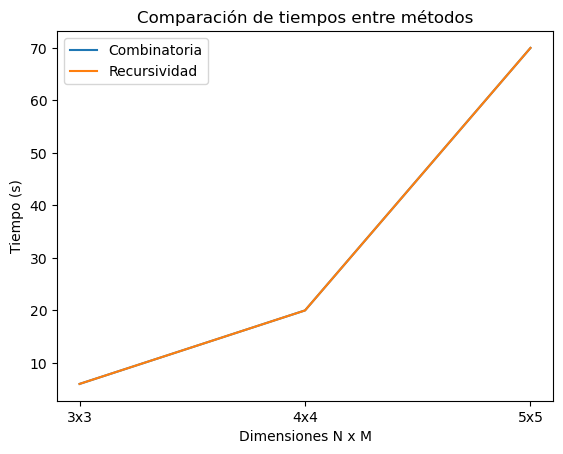

In [10]:
# 3. Caminos en una PCB

import math
from time import perf_counter
import matplotlib.pyplot as plt

# 3.
def medir_tiempo(func):
    def fun(*args, **kwargs):
        TI = perf_counter()
        resultado = func(*args, **kwargs)
        TT = perf_counter() - TI
        return resultado
    return fun


class PCB:
    def __init__(self, N, M):
        self.N = N
        self.M = M
        self.tiempos = []

    def combinatoria(self):
        return math.factorial((self.N + self.M - 2)) // (math.factorial((self.N - 1)) * math.factorial((self.M - 1)))
    
    def recursividad(self, x = 0, y = 0):
        if x == self.N - 1 and y == self.M - 1:
            return 1
        if x >= self.N or y >= self.M:
            return 0
        return self.recursividad(x + 1, y) + self.recursividad(x, y + 1)
    
    # 1.

    def tiempo_combi(self):
        TI = perf_counter()
        self.combinatoria()
        TT = perf_counter() - TI
        return print(TT)
    
    def tiempo_rec(self):
        TI = perf_counter()
        self.recursividad()
        TT = perf_counter() - TI
        return print(TT)
    
    # 2.
    
    def tiempo_sol(self, funcion):
        TI = perf_counter()
        resultado = funcion()
        TT = perf_counter() - TI
        self.tiempo.append(TT)
        return resultado


    # Decorador
    @medir_tiempo
    def tiempo_combi(self):
        return self.combinatoria()
    
    @medir_tiempo
    def tiempo_rec(self):
        return self.recursividad()
    
    def graficar_tiempos(self, inputs):
        for N, M in inputs:
            self.N = N
            self.M = M
            tiempo_combi = self.tiempo_combi()
            tiempo_rec = self.tiempo_rec()
            self.tiempos.append((N, M, tiempo_combi, tiempo_rec))

        # Gráfico de tiempos
        N_M_vals = [f"{N}x{M}" for N, M, _, _ in self.tiempos]
        tiempos_combi = [t[2] for t in self.tiempos]
        tiempos_rec = [t[3] for t in self.tiempos]

        plt.plot(N_M_vals, tiempos_combi, label="Combinatoria")
        plt.plot(N_M_vals, tiempos_rec, label="Recursividad")
        plt.xlabel("Dimensiones N x M")
        plt.ylabel("Tiempo (s)")
        plt.title("Comparación de tiempos entre métodos")
        plt.legend()
        plt.show()

# Ejemplo de uso
pcb = PCB(3, 3)
pcb.tiempo_combi()
pcb.tiempo_rec()

# Graficar tiempos para varios inputs
inputs = [(3, 3), (4, 4), (5, 5)]
pcb.graficar_tiempos(inputs) 



Se nota claramente la diferencia entre las dos soluciones, ya que en recursividad el tiempo aumenta de forma drastica mientras que la combinatoria pareciera que fuera 0 por la inmensa diferencia de tiempos.